In [1]:
from main.compiling.compilers.AncillaPerCheckCompiler import AncillaPerCheckCompiler
from main.compiling.noise.models.NoiseModel import NoiseModel
from main.compiling.noise.noises import OneQubitNoise
from main.compiling.noise.noises import OneBitNoise
from main.compiling.syndrome_extraction.extractors.ancilla_per_check.mixed.CxCyCzExtractor import CxCyCzExtractor
from main.codes.tic_tac_toe.HoneycombCode import HoneycombCode
from main.codes.tic_tac_toe.gauge_honeycomb_code import GaugeHoneycombCode
from main.codes.tic_tac_toe.FloquetColourCode import FloquetColourCode
from main.codes.tic_tac_toe.TicTacToeCode import TicTacToeCode
from main.utils.enums import State
from main.building_blocks.pauli import Pauli
from main.building_blocks.pauli.PauliLetter import PauliLetter
import stim
import sinter 
import matplotlib.pyplot as plt
import numpy as np
from beliefmatching import BeliefMatchingSinterDecoder
from main.utils.Colour import Blue, Green, Red


class HoneycombCodeZ(TicTacToeCode):
    """Adaptation of the Honeycomb code where the measurement order has been permuted
    """
    def __init__(self, distance: int):
        tic_tac_toe = [
                (Blue, PauliLetter('Z')),
                (Red, PauliLetter('X')),
                (Green, PauliLetter('Y'))]

        super().__init__(distance, tic_tac_toe)

# Help functions

In [2]:
def calculate_threshold(code_name, distances, observable_index, layer_factor,pers_x,pers_y,pers_z,mers):
    tasks = []
    if code_name == "HoneycombCodeX":
        code = HoneycombCode
    elif code_name == "HoneycombCodeZ":
        code = HoneycombCodeZ
    elif code_name == "GaugeHoneycombCodeX":
        code = GaugeHoneyCombCode
    elif code_name == "FloquetColourCodeX":
        code = FloquetColourCode
    

    for d in distances:
        for index, per_x in enumerate(pers_x):
            per_y = pers_y[index]
            per_z = pers_z[index]
            mer = mers[index]
            # generate circuit
            if code_name[-1] == 'X':
                circuit = get_X_stim_circuit(code(d), observable_index,layer_factor*d, per_x, per_y, per_z, mer)
            elif code_name[-1] == 'Z':
                circuit = get_Z_stim_circuit(code(d), observable_index, layer_factor*d, per_x, per_y, per_z, mer)
            tasks.append(sinter.Task(
                    circuit=circuit,
                    json_metadata={
                        'code': code_name,
                        'distance': d,
                        'per_x': per_x,
                        'per_y': per_y,
                        'per_z': per_z,
                        'mer': mer,
                        'layers': layer_factor*d}))

    samples = sinter.collect(
        tasks=tasks,
        hint_num_tasks=len(tasks),
        num_workers=10,
        max_shots=5000,
        max_errors=500,
        decoders=['pymatching','beliefmatching'],
        custom_decoders={'beliefmatching': BeliefMatchingSinterDecoder()},
        print_progress=True)
    return(samples)


def get_X_stim_circuit(code,observable_index,layers,per_x,per_y, per_z,mer):
    compiler = AncillaPerCheckCompiler(noise_model=NoiseModel(0,0,OneQubitNoise(per_x, per_y, per_z),0,mer), syndrome_extractor=CxCyCzExtractor())
    data_qubits = code.data_qubits.values()
    data_qubit_initial_states = {qubit: State.Plus for qubit in data_qubits}
    final_measurements = [Pauli(qubit, PauliLetter('X')) for qubit in data_qubits]
    logical_observables = [code.logical_qubits[observable_index].x]#, code.logical_qubits[1].x]
    stim_circuit: stim.Circuit = compiler.compile_to_stim(code,layers=layers,initial_states= data_qubit_initial_states, final_measurements=final_measurements,logical_observables=logical_observables)
    return(stim_circuit)

def get_Z_stim_circuit(code,observable_index,layers,per_x,per_y, per_z,mer):
    compiler = AncillaPerCheckCompiler(noise_model=NoiseModel(0,0,OneQubitNoise(per_x, per_y, per_z),0,mer), syndrome_extractor=CxCyCzExtractor())
    data_qubits = code.data_qubits.values()
    data_qubit_initial_states = {qubit: State.Zero for qubit in data_qubits}
    final_measurements = [Pauli(qubit, PauliLetter('Z')) for qubit in data_qubits]
    logical_observables = [code.logical_qubits[observable_index].z]#3, code.logical_qubits[1].z]
    stim_circuit: stim.Circuit = compiler.compile_to_stim(code,layers=layers,initial_states= data_qubit_initial_states, final_measurements=final_measurements,logical_observables=logical_observables)
    return(stim_circuit)

# Data qubit Z errors

In [11]:
hcc_X0_samples = calculate_threshold('HoneycombCodeX',[16],0,2,np.zeros(10), np.zeros(10),np.logspace(-2.2,-1.9,10),np.zeros(10))
#hcc_X1_samples = calculate_threshold('HoneycombCodeX',[4,8,12],1,2,np.zeros(10), np.zeros(10),np.logspace(-2.2,-1.9,10),np.zeros(10))

|████████████████████████████████████████✗︎ (!) 195/194 [101%] in 0.1s (1403.05/s) 
|████████████████████████████████████████✗︎ (!) 195/194 [101%] in 0.1s (1745.39/s) 
|████████████████████████████████████████✗︎ (!) 195/194 [101%] in 0.2s (1049.72/s) 
|████████████████████████████████████████✗︎ (!) 195/194 [101%] in 0.1s (1469.49/s) 
|████████████████████████████████████████✗︎ (!) 195/194 [101%] in 0.2s (1271.75/s) 
|████████████████████████████████████████✗︎ (!) 195/194 [101%] in 0.1s (1541.83/s) 
|████████████████████████████████████████✗︎ (!) 195/194 [101%] in 0.1s (1460.12/s) 
|████████████████████████████████████████✗︎ (!) 195/194 [101%] in 0.1s (1511.92/s) 
|████████████████████████████████████████✗︎ (!) 195/194 [101%] in 0.2s (1110.66/s) 
|████████████████████████████████████████✗︎ (!) 195/194 [101%] in 0.2s (1176.59/s) 
|████████████████████████████████████████✗︎ (!) 387/386 [100%] in 0.8s (479.22/s)                                        eta: 1s) 
|████████████████████████████

Starting workers...
30 cases left:
        pymatching processes=1  ~core_mins_left=None    (initializing...) {code=HoneycombCodeX,distance=4,layers=8,mer=0.0,per_x=0.0,per_y=0.0,per_z=0.00630957344480193}
    beliefmatching processes=1  ~core_mins_left=None    (initializing...) {code=HoneycombCodeX,distance=4,layers=8,mer=0.0,per_x=0.0,per_y=0.0,per_z=0.00630957344480193}
        pymatching processes=1  ~core_mins_left=None    (initializing...) {code=HoneycombCodeX,distance=4,layers=8,mer=0.0,per_x=0.0,per_y=0.0,per_z=0.006812920690579608}
    beliefmatching processes=1  ~core_mins_left=None    (initializing...) {code=HoneycombCodeX,distance=4,layers=8,mer=0.0,per_x=0.0,per_y=0.0,per_z=0.006812920690579608}
        pymatching processes=1  ~core_mins_left=None    (initializing...) {code=HoneycombCodeX,distance=4,layers=8,mer=0.0,per_x=0.0,per_y=0.0,per_z=0.007356422544596414}
    beliefmatching processes=1  ~core_mins_left=None    (initializing...) {code=HoneycombCodeX,distance=4,layers

|████████████████████████████████████████✗︎ (!) 195/194 [101%] in 0.3s (568.38/s)                                        
|████████████████████████████████████████✗︎ (!) 195/194 [101%] in 0.3s (728.10/s)                                        
|████████████████████████████████████████✗︎ (!) 195/194 [101%] in 0.3s (720.03/s)                                        
|████████████████████████████████████████✗︎ (!) 195/194 [101%] in 0.3s (650.95/s)                                        
|████████████████████████████████████████✗︎ (!) 195/194 [101%] in 0.3s (559.29/s)                                        ta: 0s) 
|████████████████████████████████████████✗︎ (!) 195/194 [101%] in 0.7s (260.03/s)                                        
|████████████████████████████████████████✗︎ (!) 195/194 [101%] in 0.4s (486.28/s)                                         
|████████████████████████████████████████✗︎ (!) 195/194 [101%] in 0.3s (571.70/s)                                        
|██████████████

Starting workers...
30 cases left:
        pymatching processes=1  ~core_mins_left=None    (initializing...) {code=HoneycombCodeX,distance=4,layers=8,mer=0.0,per_x=0.0,per_y=0.0,per_z=0.00630957344480193}
    beliefmatching processes=1  ~core_mins_left=None    (initializing...) {code=HoneycombCodeX,distance=4,layers=8,mer=0.0,per_x=0.0,per_y=0.0,per_z=0.00630957344480193}
        pymatching processes=1  ~core_mins_left=None    (initializing...) {code=HoneycombCodeX,distance=4,layers=8,mer=0.0,per_x=0.0,per_y=0.0,per_z=0.006812920690579608}
    beliefmatching processes=1  ~core_mins_left=None    (initializing...) {code=HoneycombCodeX,distance=4,layers=8,mer=0.0,per_x=0.0,per_y=0.0,per_z=0.006812920690579608}
        pymatching processes=1  ~core_mins_left=None    (initializing...) {code=HoneycombCodeX,distance=4,layers=8,mer=0.0,per_x=0.0,per_y=0.0,per_z=0.007356422544596414}
    beliefmatching processes=1  ~core_mins_left=None    (initializing...) {code=HoneycombCodeX,distance=4,layers

In [12]:
hcc_Z0_samples = calculate_threshold('HoneycombCodeZ',[1],0,2,np.zeros(10), np.zeros(10),np.logspace(-2.2,-1.9,10),np.zeros(10))
hcc_Z1_samples = calculate_threshold('HoneycombCodeZ',[4,8,12],1,2,np.zeros(10), np.zeros(10),np.logspace(-2.2,-1.9,10),np.zeros(10))

|████████████████████████████████████████✗︎ (!) 195/194 [101%] in 0.5s (410.29/s)                                        ta: 0s) 
|████████████████████████████████████████✗︎ (!) 195/194 [101%] in 0.3s (563.92/s)                                        
|████████████████████████████████████████✗︎ (!) 195/194 [101%] in 0.3s (610.27/s)                                        
|████████████████████████████████████████✗︎ (!) 195/194 [101%] in 0.3s (718.99/s)                                        
|████████████████████████████████████████✗︎ (!) 195/194 [101%] in 0.3s (709.17/s)                                        
|████████████████████████████████████████✗︎ (!) 195/194 [101%] in 0.3s (699.80/s)                                        
|████████████████████████████████████████✗︎ (!) 195/194 [101%] in 0.3s (664.03/s)                                        
|████████████████████████████████████████✗︎ (!) 195/194 [101%] in 0.3s (622.34/s)                                        
|███████████████

Starting workers...
30 cases left:
        pymatching processes=1  ~core_mins_left=None    (initializing...) {code=HoneycombCodeZ,distance=4,layers=8,mer=0.0,per_x=0.0,per_y=0.0,per_z=0.00630957344480193}
    beliefmatching processes=1  ~core_mins_left=None    (initializing...) {code=HoneycombCodeZ,distance=4,layers=8,mer=0.0,per_x=0.0,per_y=0.0,per_z=0.00630957344480193}
        pymatching processes=1  ~core_mins_left=None    (initializing...) {code=HoneycombCodeZ,distance=4,layers=8,mer=0.0,per_x=0.0,per_y=0.0,per_z=0.006812920690579608}
    beliefmatching processes=1  ~core_mins_left=None    (initializing...) {code=HoneycombCodeZ,distance=4,layers=8,mer=0.0,per_x=0.0,per_y=0.0,per_z=0.006812920690579608}
        pymatching processes=1  ~core_mins_left=None    (initializing...) {code=HoneycombCodeZ,distance=4,layers=8,mer=0.0,per_x=0.0,per_y=0.0,per_z=0.007356422544596414}
    beliefmatching processes=1  ~core_mins_left=None    (initializing...) {code=HoneycombCodeZ,distance=4,layers

|████████████████████████████████████████✗︎ (!) 195/194 [101%] in 0.3s (728.45/s)                                        
|████████████████████████████████████████✗︎ (!) 195/194 [101%] in 0.3s (710.03/s)                                        
|████████████████████████████████████████✗︎ (!) 195/194 [101%] in 0.3s (726.22/s)                                        
|████████████████████████████████████████✗︎ (!) 195/194 [101%] in 0.3s (712.66/s)                                        
|████████████████████████████████████████✗︎ (!) 195/194 [101%] in 0.3s (725.65/s)                                        
|████████████████████████████████████████✗︎ (!) 195/194 [101%] in 0.3s (724.16/s)                                        
|████████████████████████████████████████✗︎ (!) 195/194 [101%] in 0.2s (795.35/s)                                        
|████████████████████████████████████████✗︎ (!) 195/194 [101%] in 0.3s (778.50/s)                                        
|███████████████████████

Starting workers...
30 cases left:
        pymatching processes=1  ~core_mins_left=None    (initializing...) {code=HoneycombCodeZ,distance=4,layers=8,mer=0.0,per_x=0.0,per_y=0.0,per_z=0.00630957344480193}
    beliefmatching processes=1  ~core_mins_left=None    (initializing...) {code=HoneycombCodeZ,distance=4,layers=8,mer=0.0,per_x=0.0,per_y=0.0,per_z=0.00630957344480193}
        pymatching processes=1  ~core_mins_left=None    (initializing...) {code=HoneycombCodeZ,distance=4,layers=8,mer=0.0,per_x=0.0,per_y=0.0,per_z=0.006812920690579608}
    beliefmatching processes=1  ~core_mins_left=None    (initializing...) {code=HoneycombCodeZ,distance=4,layers=8,mer=0.0,per_x=0.0,per_y=0.0,per_z=0.006812920690579608}
        pymatching processes=1  ~core_mins_left=None    (initializing...) {code=HoneycombCodeZ,distance=4,layers=8,mer=0.0,per_x=0.0,per_y=0.0,per_z=0.007356422544596414}
    beliefmatching processes=1  ~core_mins_left=None    (initializing...) {code=HoneycombCodeZ,distance=4,layers

In [3]:
fcc_samples = calculate_threshold('FloquetColourCode',[4,8,12],1,np.zeros(10),np.zeros(10),np.logspace(-2.3,-1.95,10),np.zeros(10))

TypeError: calculate_threshold() missing 1 required positional argument: 'mers'

NameError: name 'hcc_X0_samples' is not defined

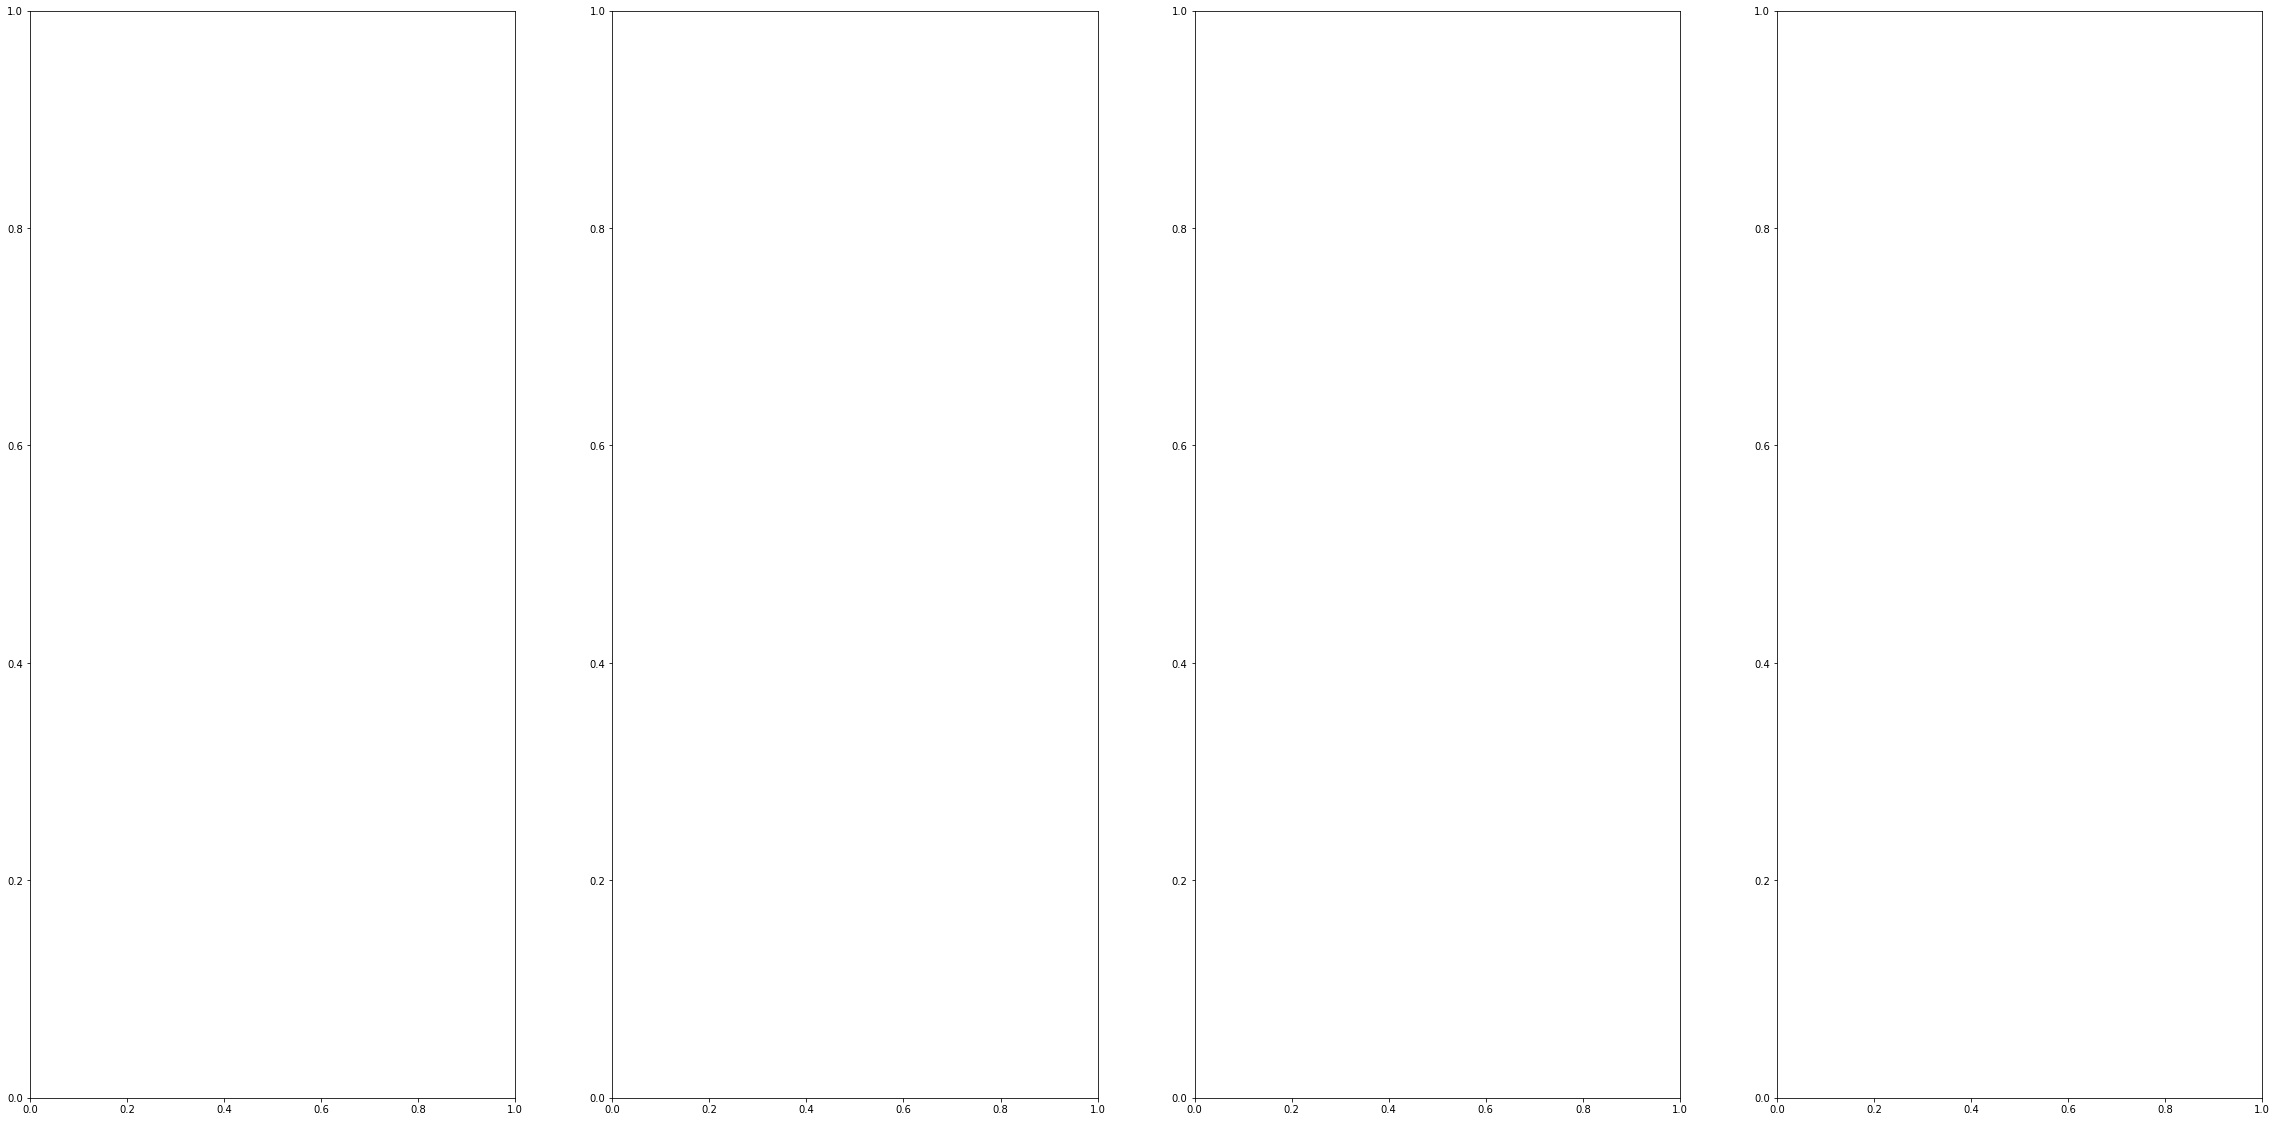

In [4]:
fig, axis = plt.subplots(1, 4,figsize=(40,20))
sinter.plot_error_rate(
        ax=axis[0],
        stats=hcc_X0_samples,
        group_func=lambda stat: f"HoneycombCodeX, d={stat.json_metadata['distance']}, dec={stat.decoder}",
        x_func=lambda stat: stat.json_metadata['per_z'])

sinter.plot_error_rate(
        ax=axis[1],
        stats=hcc_X1_samples,
        group_func=lambda stat: f"HoneycombCodeX, d={stat.json_metadata['distance']}, dec={stat.decoder}",
        x_func=lambda stat: stat.json_metadata['per_z'])

sinter.plot_error_rate(
        ax=axis[2],
        stats=hcc_Z0_samples,
        group_func=lambda stat: f"HoneycombCodeZ, d={stat.json_metadata['distance']}, dec={stat.decoder}",
        x_func=lambda stat: stat.json_metadata['per_z'])

sinter.plot_error_rate(
        ax=axis[3],
        stats=hcc_Z1_samples,
        group_func=lambda stat: f"HoneycombCodeZ, d={stat.json_metadata['distance']}, dec={stat.decoder}",
        x_func=lambda stat: stat.json_metadata['per_z'])
"""

sinter.plot_error_rate(
        ax=axis[1],
        stats=fcc_samples,
        group_func=lambda stat: f"FloquetColourCode, d={stat.json_metadata['distance']}",
        x_func=lambda stat: stat.json_metadata['p'])
"""
#print(hcc_samples)
for ax in axis:
    ax.set_yscale('log')
    ax.set_xlabel('physical error rate')
    ax.set_ylabel('logical error rate')
    ax.legend(loc='lower right')

# Data qubit Y error

In [4]:
hcc_y_error_samples = calculate_threshold('HoneycombCode',[4],2,np.zeros(10),np.logspace(-2.2,-1.8,10),np.zeros(10),np.zeros(10))

|████████████████████████████████████████✗︎ (!) 195/194 [101%] in 0.1s (1466.33/s) 
|████████████████████████████████████████✗︎ (!) 195/194 [101%] in 0.1s (1306.61/s) 
|████████████████████████████████████████✗︎ (!) 195/194 [101%] in 0.1s (1385.81/s) 
|████████████████████████████████████████✗︎ (!) 195/194 [101%] in 0.1s (1405.38/s) 
|████████████████████████████████████████✗︎ (!) 195/194 [101%] in 0.2s (962.62/s) 
|████████████████████████████████████████✗︎ (!) 195/194 [101%] in 0.3s (712.94/s) 
|████████████████████████████████████████✗︎ (!) 195/194 [101%] in 0.2s (1109.59/s) 
|████████████████████████████████████████✗︎ (!) 195/194 [101%] in 0.2s (1038.86/s) 
|████████████████████████████████████████✗︎ (!) 195/194 [101%] in 0.2s (1014.74/s) 
|████████████████████████████████████████✗︎ (!) 195/194 [101%] in 0.1s (1524.69/s) 


Starting workers...
10 cases left
    case: processes=1  ~core_mins_left=None    (initializing...) {'code': 'HoneycombCode', 'distance': 4, 'per_x': 0.0, 'per_y': 0.00630957344480193, 'per_z': 0.0, 'mer': 0.0, 'layers': 8}
    case: processes=1  ~core_mins_left=None    (initializing...) {'code': 'HoneycombCode', 'distance': 4, 'per_x': 0.0, 'per_y': 0.006989473207273479, 'per_z': 0.0, 'mer': 0.0, 'layers': 8}
    case: processes=1  ~core_mins_left=None    (initializing...) {'code': 'HoneycombCode', 'distance': 4, 'per_x': 0.0, 'per_y': 0.007742636826811269, 'per_z': 0.0, 'mer': 0.0, 'layers': 8}
    case: processes=1  ~core_mins_left=None    (initializing...) {'code': 'HoneycombCode', 'distance': 4, 'per_x': 0.0, 'per_y': 0.008576958985908937, 'per_z': 0.0, 'mer': 0.0, 'layers': 8}
    case: processes=1  ~core_mins_left=None    (initializing...) {'code': 'HoneycombCode', 'distance': 4, 'per_x': 0.0, 'per_y': 0.009501185073181439, 'per_z': 0.0, 'mer': 0.0, 'layers': 8}
    case: process

In [ ]:
fcc_y_error_samples = calculate_threshold('FloquetColourCode',[4,8,12],1,np.zeros(10),np.logspace(-2.2,-1.8,10),np.zeros(10))

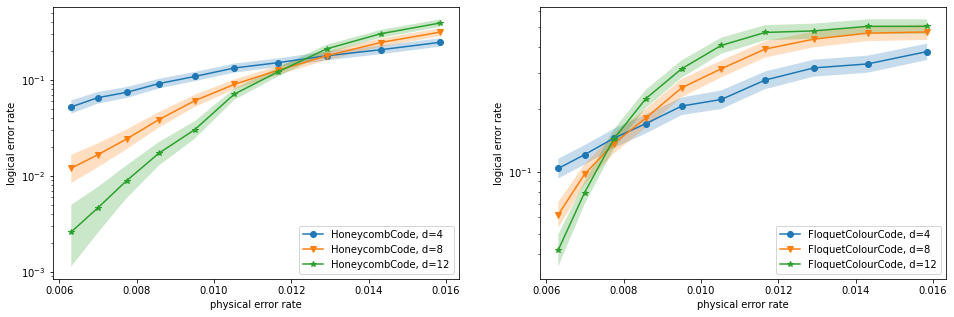

In [164]:
fig, axis = plt.subplots(1, 2,figsize=(16,5))
sinter.plot_error_rate(
        ax=axis[0],
        stats=hcc_y_error_samples,
        group_func=lambda stat: f"HoneycombCode, d={stat.json_metadata['distance']}",
        x_func=lambda stat: stat.json_metadata['per_y'])

sinter.plot_error_rate(
        ax=axis[1],
        stats=fcc_y_error_samples,
        group_func=lambda stat: f"FloquetColourCode, d={stat.json_metadata['distance']}",
        x_func=lambda stat: stat.json_metadata['per_y'])

for ax in axis:
    ax.set_yscale('log')
    ax.set_xlabel('physical error rate')
    ax.set_ylabel('logical error rate')
    ax.legend(loc='lower right')

In [175]:
#def get_stim_circuit(code,layers,per_x,per_y, per_z):
fcc_y_circ=get_stim_circuit(FloquetColourCode(4),4,0,0.1,0)
fcc_y_circ.detector_error_model(approximate_disjoint_errors=True).diagram(type="match-graph-3d")

|████████████████████████████████████████✗︎ (!) 195/194 [101%] in 0.3s (677.76/s)                                        
96 num detectors
312 num measurements
60 num qubits


{"accessors":[{"bufferView":0,"byteOffset":0,"componentType":5126,"count":17,"max":[0,0.400000005960464,0.400000005960464],"min":[0,-0.400000005960464,-0.400000005960464],"name":"circle_loop","type":"VEC3"},{"bufferView":1,"byteOffset":0,"componentType":5126,"count":40,"max":[66,30,12],"min":[12,0,0],"name":"buf_scattered_lines","type":"VEC3"},{"bufferView":2,"byteOffset":0,"componentType":5126,"count":8,"max":[30,30,12],"min":[12,0,0],"name":"buf_red_scattered_lines","type":"VEC3"},{"bufferView":3,"byteOffset":0,"componentType":5126,"count":3888,"max":[66,30,72],"min":[12,0,6],"name":"buf_blue_scattered_lines","type":"VEC3"}],"asset":{"version":"2.0"},"bufferViews":[{"buffer":0,"byteLength":204,"byteOffset":0,"name":"circle_loop","target":34962},{"buffer":1,"byteLength":480,"byteOffset":0,"name":"buf_scattered_lines","target":34962},{"buffer":2,"byteLength":96,"byteOffset":0,"name":"buf_red_scattered_lines","target":34962},{"buffer":3,"byteLength":46656,"byteOffset":0,"name":"buf_blue_scattered_lines","target":34962}],"buffers":[{"byteLength":204,"name":"circle_loop","uri":"data:application/octet-stream;base64,AAAAAM3MzD4AAAAAAAAAAOU1vT5Fvxw+AAAAAMPQkD7D0JA+AAAAAES/HD7lNb0+AAAAAPIwlrLNzMw+AAAAAEe/HL7lNb0+AAAAAMPQkL7D0JA+AAAAAOc1vb5Avxw+AAAAAM3MzL7yMBazAAAAAOU1vb5Evxy+AAAAAMHQkL7E0JC+AAAAADy/HL7nNb2+AAAAAPLkozHNzMy+AAAAAEm/HD7kNb2+AAAAAMbQkD6/0JC+AAAAAOY1vT5Evxy+AAAAAM3MzD4AAAAA"},{"byteLength":480,"name":"buf_scattered_lines","uri":"data:application/octet-stream;base64,AADwQQAAAAAAAAAAAADwQQAAwEEAAMBAAADwQQAAAAAAAAAAAABAQgAAwEAAAMBAAABAQQAAkEEAAAAAAABAQQAAwEAAAMBAAABAQQAAkEEAAAAAAACEQgAAwEEAAMBAAABAQgAAkEEAAAAAAADwQQAAwEEAAMBAAABAQgAAkEEAAAAAAABAQgAAwEAAAMBAAABAQgAAkEEAAAAAAACEQgAAwEEAAMBAAACEQgAAAAAAAAAAAABAQQAAwEAAAMBAAACEQgAAAAAAAAAAAABAQgAAwEAAAMBAAACEQgAAAAAAAAAAAACEQgAAwEEAAMBAAADwQQAAwEEAAMBAAADwQQAAQEEAAEBBAADwQQAAwEEAAMBAAABAQgAA8EEAAEBBAABAQQAAwEAAAMBAAABAQQAA8EEAAEBBAABAQQAAwEAAAMBAAACEQgAAQEEAAEBBAABAQgAAwEAAAMBAAADwQQAAQEEAAEBBAABAQgAAwEAAAMBAAABAQgAA8EEAAEBBAABAQgAAwEAAAMBAAACEQgAAQEEAAEBBAACEQgAAwEEAAMBAAABAQQAA8EEAAEBBAACEQgAAwEEAAMBAAABAQgAA8EEAAEBBAACEQgAAwEEAAMBAAACEQgAAQEEAAEBB"},{"byteLength":96,"name":"buf_red_scattered_lines","uri":"data:application/octet-stream;base64,AADwQQAAAAAAAAAAAABAQQAAwEAAAMBAAABAQQAAkEEAAAAAAADwQQAAwEEAAMBAAADwQQAAwEEAAMBAAABAQQAA8EEAAEBBAABAQQAAwEAAAMBAAADwQQAAQEEAAEBB"},{"byteLength":46656,"name":"buf_blue_scattered_lines","uri":"data:application/octet-stream;base64,AADwQQAAoEEAADBBAADwQQAAwEEAAMBAAADwQQAAoEEAADBBAADwQQAAQEEAAEBBAADwQQAAoEEAADBBAADwQQAAwEEAAHBBAADAQQAA0EEAADBBAADwQQAAwEEAAMBAAADAQQAA0EEAADBBAABAQQAA8EEAAEBBAADAQQAA0EEAADBBAADwQQAAwEEAAHBBAAAQQgAA0EEAADBBAADwQQAAwEEAAMBAAAAQQgAA0EEAADBBAABAQgAA8EEAAEBBAAAQQgAA0EEAADBBAADwQQAAwEEAAHBBAACQQQAAAEEAADBBAABAQQAAwEAAAMBAAACQQQAAAEEAADBBAADwQQAAQEEAAEBBAACQQQAAAEEAADBBAABAQQAAwEAAAHBBAABAQQAAYEEAADBBAABAQQAAwEAAAMBAAABAQQAAYEEAADBBAABAQQAA8EEAAEBBAABAQQAAYEEAADBBAABAQQAAwEAAAHBBAADwQQAAAEEAADBBAABAQQAAwEAAAMBAAADwQQAAAEEAADBBAACEQgAAQEEAAEBBAADwQQAAAEEAADBBAABAQQAAwEAAAHBBAAAoQgAAAEEAADBBAABAQgAAwEAAAMBAAAAoQgAAAEEAADBBAADwQQAAQEEAAEBBAAAoQgAAAEEAADBBAABAQgAAwEAAAHBBAABAQgAAYEEAADBBAABAQgAAwEAAAMBAAABAQgAAYEEAADBBAABAQgAA8EEAAEBBAABAQgAAYEEAADBBAABAQgAAwEAAAHBBAABYQgAAAEEAADBBAABAQgAAwEAAAMBAAABYQgAAAEEAADBBAACEQgAAQEEAAEBBAABYQgAAAEEAADBBAABAQgAAwEAAAHBBAABAQgAA0EEAADBBAACEQgAAwEEAAMBAAABAQgAA0EEAADBBAABAQQAA8EEAAEBBAABAQgAA0EEAADBBAACEQgAAwEEAAHBBAABwQgAA0EEAADBBAACEQgAAwEEAAMBAAABwQgAA0EEAADBBAABAQgAA8EEAAEBBAABwQgAA0EEAADBBAACEQgAAwEEAAHBBAACEQgAAoEEAADBBAACEQgAAwEEAAMBAAACEQgAAoEEAADBBAACEQgAAQEEAAEBBAACEQgAAoEEAADBBAACEQgAAwEEAAHBBAADMQQAAhEEAAIRBAADwQQAAQEEAAEBBAADMQQAAhEEAAIRBAADwQQAAwEEAAHBBAADMQQAAhEEAAIRBAABAQQAAkEEAAJBBAADMQQAAhEEAAIRBAADwQQAAQEEAAKhBAADAQQAAkEEAAHBBAADwQQAAQEEAAEBBAADAQQAAkEEAAHBBAADwQQAAwEEAAHBBAADAQQAAkEEAAHBBAABAQQAAkEEAAJBBAAAQQgAAkEEAAHBBAADwQQAAQEEAAEBBAAAQQgAAkEEAAHBBAADwQQAAwEEAAHBBAAAQQgAAkEEAAHBBAABAQgAAkEEAAJBBAAAKQgAAhEEAAIRBAADwQQAAQEEAAEBBAAAKQgAAhEEAAIRBAADwQQAAwEEAAHBBAAA

In [174]:
hcc_y_circ=get_stim_circuit(HoneycombCode(4),8,0,0.1,0)
hcc_y_circ.detector_error_model(decompose_errors=True, approximate_disjoint_errors=True).diagram(type="match-graph-3d")

|████████████████████████████████████████✗︎ (!) 195/194 [101%] in 0.2s (1085.97/s) 
96 num detectors
312 num measurements
60 num qubits


{"accessors":[{"bufferView":0,"byteOffset":0,"componentType":5126,"count":17,"max":[0,0.400000005960464,0.400000005960464],"min":[0,-0.400000005960464,-0.400000005960464],"name":"circle_loop","type":"VEC3"},{"bufferView":1,"byteOffset":0,"componentType":5126,"count":796,"max":[73.6336975097656,30,78.330078125],"min":[4.36630010604858,0,0],"name":"buf_scattered_lines","type":"VEC3"},{"bufferView":2,"byteOffset":0,"componentType":5126,"count":76,"max":[30,30,72],"min":[12,0,0],"name":"buf_red_scattered_lines","type":"VEC3"}],"asset":{"version":"2.0"},"bufferViews":[{"buffer":0,"byteLength":204,"byteOffset":0,"name":"circle_loop","target":34962},{"buffer":1,"byteLength":9552,"byteOffset":0,"name":"buf_scattered_lines","target":34962},{"buffer":2,"byteLength":912,"byteOffset":0,"name":"buf_red_scattered_lines","target":34962}],"buffers":[{"byteLength":204,"name":"circle_loop","uri":"data:application/octet-stream;base64,AAAAAM3MzD4AAAAAAAAAAOU1vT5Fvxw+AAAAAMPQkD7D0JA+AAAAAES/HD7lNb0+AAAAAPIwlrLNzMw+AAAAAEe/HL7lNb0+AAAAAMPQkL7D0JA+AAAAAOc1vb5Avxw+AAAAAM3MzL7yMBazAAAAAOU1vb5Evxy+AAAAAMHQkL7E0JC+AAAAADy/HL7nNb2+AAAAAPLkozHNzMy+AAAAAEm/HD7kNb2+AAAAAMbQkD6/0JC+AAAAAOY1vT5Evxy+AAAAAM3MzD4AAAAA"},{"byteLength":9552,"name":"buf_scattered_lines","uri":"data:application/octet-stream;base64,AADwQQAAAAAAAAAAAADwQQAAwEEAAMBAAADwQQAAAAAAAAAAAABAQgAAwEAAAMBAAABAQQAAkEEAAAAAAABAQQAAwEAAAMBAAABAQQAAkEEAAAAAAACEQgAAwEEAAMBAAABAQgAAkEEAAAAAAADwQQAAwEEAAMBAAABAQgAAkEEAAAAAAABAQgAAwEAAAMBAAABAQgAAkEEAAAAAAACEQgAAwEEAAMBAAACEQgAAAAAAAAAAAABAQQAAwEAAAMBAAACEQgAAAAAAAAAAAABAQgAAwEAAAMBAAACEQgAAAAAAAAAAAACEQgAAwEEAAMBAAADwQQAAwEEAAMBAAADwQQAAQEEAAEBBAADwQQAAwEEAAMBAAABAQgAA8EEAAEBBAABAQQAAwEAAAMBAAABAQQAA8EEAAEBBAABAQQAAwEAAAMBAAACEQgAAQEEAAEBBAABAQgAAwEAAAMBAAADwQQAAQEEAAEBBAABAQgAAwEAAAMBAAABAQgAA8EEAAEBBAABAQgAAwEAAAMBAAACEQgAAQEEAAEBBAACEQgAAwEEAAMBAAABAQQAA8EEAAEBBAACEQgAAwEEAAMBAAABAQgAA8EEAAEBBAACEQgAAwEEAAMBAAACEQgAAQEEAAEBBAADwQQAAQEEAAEBBAADwQQAAAAAAAJBBAABAQQAAwEAAAHBBu7iLQNIlXUC6ABFBAADwQQAAQEEAAEBBAADwQQAAAAAAAJBBAABAQgAAwEAAAHBBDKlOQkZvFUAoV85AAADwQQAAwEEAAHBB6a3SQRdS3UEoV85AAABAQQAAwEAAAHBBu7iLQNIlXUC6ABFBAADwQQAAQEEAAEBBAABAQgAAkEEAAJBBAADwQQAAwEEAAHBB6a3SQRdS3UEoV85AAADwQQAAQEEAAEBBAABAQgAAkEEAAJBBAABAQgAAwEAAAHBBDKlOQkZvFUAoV85AAADwQQAAwEEAAHBB6a3SQRdS3UEoV85AAABAQQAAwEAAAHBBu7iLQNIlXUC6ABFBAABAQQAA8EEAAEBBAABAQQAAkEEAAJBBAADwQQAAwEEAAHBB6a3SQRdS3UEoV85AAABAQQAA8EEAAEBBAABAQQAAkEEAAJBBAACEQgAAwEEAAHBBdESTQkZb1EG6ABFBAABAQQAA8EEAAEBBAACEQgAAAAAAAJBBAABAQQAAwEAAAHBBu7iLQNIlXUC6ABFBAABAQQAA8EEAAEBBAACEQgAAAAAAAJBBAACEQgAAwEEAAHBBdESTQkZb1EG6ABFBAABAQgAA8EEAAEBBAADwQQAAAAAAAJBBAADwQQAAwEEAAHBB6a3SQRdS3UEoV85AAABAQgAA8EEAAEBBAADwQQAAAAAAAJBBAABAQgAAwEAAAHBBDKlOQkZvFUAoV85AAABAQgAA8EEAAEBBAABAQgAAkEEAAJBBAADwQQAAwEEAAHBB6a3SQRdS3UEoV85AAABAQgAA8EEAAEBBAABAQgAAkEEAAJBBAACEQgAAwEEAAHBBdESTQkZb1EG6ABFBAABAQgAA8EEAAEBBAACEQgAAAAAAAJBBAABAQgAAwEAAAHBBDKlOQkZvFUAoV85AAABAQgAA8EEAAEBBAACEQgAAAAAAAJBBAACEQgAAwEEAAHBBdESTQkZb1EG6ABFBAACEQgAAQEEAAEBBAABAQQAAkEEAAJBBAABAQQAAwEAAAHBBu7iLQNIlXUC6ABFBAACEQgAAQEEAAEBBAABAQQAAkEEAAJBBAACEQgAAwEEAAHBBdESTQkZb1EG6ABFBAACEQgAAQEEAAEBBAABAQgAAkEEAAJBBAABAQgAAwEAAAHBBDKlOQkZvFUAoV85AAACEQgAAQEEAAEBBAABAQgAAkEEAAJBBAACEQgAAwEEAAHBBdESTQkZb1EG6ABFBAACEQgAAQEEAAEBBAACEQgAAAAAAAJBBAABAQQAAwEAAAHBBu7iLQNIlXUC6ABFBAACEQgAAQEEAAEBBAACEQgAAAAAAAJBBAABAQgAAwEAAAHBBDKlOQkZvFUAoV85AAADwQQAAwEEAAHBBAADwQQAAQEEAAKhBAADwQQAAwEEAAHBBAABAQQAA8EEAAKhBAADwQQAAwEEAAHBBAABAQgAA8EEAAKhBAABAQQAAwEAAAHBBAADwQQAAQEEAAKhBAABAQQAAwEAAAHBBAABAQQAA8EEAAKhBAABAQQAAwEAAAHBBAACEQgAAQEEAAKhBAABAQgAAwEAAAHBBAADwQQAAQEEAAKhBAABAQgAAwEAAAHBBAABAQgAA8EEAAKhBAABAQgAAwEAAAHBBAACEQgAAQEEAAKhBAACEQgAAwEEAAHBBAABAQQAA8EEAAKhBAACEQgAAwEEAAHBBAABAQgAA8EEAAKhBAACEQgAAwEEAAHBBAACEQgAAQEEAAKhBAADwQQAAAAAAAJBBAADwQQAAwEEAAMBBAABAQQAA8EEAAKhBAADwQQAAAAAAANhBAADwQQAAAAAAAJBBAADwQQAAwEEAAMBBAABAQgAA8EEAAKhBAADwQQAAAAAAANhBAADwQQAAQEEAAKhBAADwQQAAAAAAANhBAABAQQAA8EEAAKhBAADwQQAAAAAAANhBAADwQQAAAAAAAJBBAABAQgAAwEAAAMBBAADwQQAAQEEAAKhBAADwQQAAAAAAANhBAADwQQAAAAAAAJBB

# Data qubit X error 1 round

In [20]:
hcc_X_error_samples_1_round = calculate_threshold('HoneycombCode',[4,8,12],2,np.linspace(0.01,0.015,6),np.zeros(10), np.zeros(10),np.zeros(10))

0.0
|████████████████████████████████████████✗︎ (!) 195/194 [101%] in 0.4s (514.75/s)                                        
96 num detectors
312 num measurements
60 num qubits
0.0
|████████████████████████████████████████✗︎ (!) 195/194 [101%] in 0.5s (400.63/s)                                        
96 num detectors
312 num measurements
60 num qubits
0.0
|████████████████████████████████████████✗︎ (!) 195/194 [101%] in 0.4s (469.69/s)                                        
96 num detectors
312 num measurements
60 num qubits
0.0
|████████████████████████████████████████✗︎ (!) 195/194 [101%] in 0.4s (444.03/s)                                        
96 num detectors
312 num measurements
60 num qubits
0.0
|████████████████████████████████████████✗︎ (!) 195/194 [101%] in 0.4s (544.58/s)                                        
96 num detectors
312 num measurements
60 num qubits
0.0
|████████████████████████████████████████✗︎ (!) 195/194 [101%] in 0.5s (364.63/s)                         

Starting workers...


2592 num detectors
7992 num measurements
540 num qubits


Finding work...
18 cases left
    case: processes=1  ~core_mins_left=None    shots_left=1000     errors_left=100     {'code': 'HoneycombCode', 'distance': 4, 'per_x': 0.01, 'per_y': 0.0, 'per_z': 0.0, 'layers': 8}
    case: processes=1  ~core_mins_left=None    shots_left=1000     errors_left=100     {'code': 'HoneycombCode', 'distance': 4, 'per_x': 0.011, 'per_y': 0.0, 'per_z': 0.0, 'layers': 8}
    case: processes=1  ~core_mins_left=None    shots_left=1000     errors_left=100     {'code': 'HoneycombCode', 'distance': 4, 'per_x': 0.012, 'per_y': 0.0, 'per_z': 0.0, 'layers': 8}
    case: processes=1  ~core_mins_left=None    shots_left=1000     errors_left=100     {'code': 'HoneycombCode', 'distance': 4, 'per_x': 0.013, 'per_y': 0.0, 'per_z': 0.0, 'layers': 8}
    case: processes=1  ~core_mins_left=None    shots_left=1000     errors_left=100     {'code': 'HoneycombCode', 'distance': 4, 'per_x': 0.013999999999999999, 'per_y': 0.0, 'per_z': 0.0, 'layers': 8}
    case: processes=1  ~core_mi

In [4]:
fcc_X_error_samples_1_round = calculate_threshold('FloquetColourCode',[4,8,12],1,np.linspace(0.007,0.012,6),np.zeros(10),np.zeros(10),np.zeros(10))

|████████████████████████████████████████✗︎ (!) 195/194 [101%] in 0.1s (1339.10/s) 
|████████████████████████████████████████✗︎ (!) 195/194 [101%] in 0.2s (1151.04/s) 
|████████████████████████████████████████✗︎ (!) 195/194 [101%] in 0.2s (1054.08/s) 
|████████████████████████████████████████✗︎ (!) 195/194 [101%] in 0.2s (1015.61/s) 
|████████████████████████████████████████✗︎ (!) 195/194 [101%] in 0.2s (1222.67/s) 
|████████████████████████████████████████✗︎ (!) 195/194 [101%] in 0.2s (1293.76/s) 
|████████████████████████████████████████✗︎ (!) 387/386 [100%] in 1.0s (392.02/s)                                         163/386 [42%] in 1s (285.6/s, eta: 2s) 
|████████████████████████████████████████✗︎ (!) 387/386 [100%] in 0.9s (409.54/s)                                        eta: 1s) 
|⚠︎                                       | (!) 0/386 [0%] in 0.1s (0.00/s)                                              


KeyboardInterrupt: 

# Data qubit X error 2 rounds

In [22]:
hcc_X_error_samples_2_rounds = calculate_threshold('HoneycombCode',[4,8,12],4,np.linspace(0.008,0.018,10),np.zeros(10), np.zeros(10), np.zeros(10))

0.0
|████████████████████████████████████████✗︎ (!) 387/386 [100%] in 0.6s (627.45/s)                                        
192 num detectors
600 num measurements
60 num qubits
0.0
|████████████████████████████████████████✗︎ (!) 387/386 [100%] in 0.7s (545.74/s)                                        eta: 1s) 
192 num detectors
600 num measurements
60 num qubits
0.0
|████████████████████████████████████████✗︎ (!) 387/386 [100%] in 0.7s (574.75/s)                                        ta: 1s) 
192 num detectors
600 num measurements
60 num qubits
0.0
|████████████████████████████████████████✗︎ (!) 387/386 [100%] in 0.6s (626.97/s)                                         0s) 
192 num detectors
600 num measurements
60 num qubits
0.0
|████████████████████████████████████████✗︎ (!) 387/386 [100%] in 0.5s (732.01/s)                                        
192 num detectors
600 num measurements
60 num qubits
0.0
|████████████████████████████████████████✗︎ (!) 387/386 [100%] in 0.7s (576.53/

Starting workers...
30 cases left
    case: processes=1  ~core_mins_left=None    (initializing...) {'code': 'HoneycombCode', 'distance': 4, 'per_x': 0.008, 'per_y': 0.0, 'per_z': 0.0, 'layers': 16}
    case: processes=1  ~core_mins_left=None    (initializing...) {'code': 'HoneycombCode', 'distance': 4, 'per_x': 0.009111111111111111, 'per_y': 0.0, 'per_z': 0.0, 'layers': 16}
    case: processes=1  ~core_mins_left=None    (initializing...) {'code': 'HoneycombCode', 'distance': 4, 'per_x': 0.010222222222222223, 'per_y': 0.0, 'per_z': 0.0, 'layers': 16}
    case: processes=1  ~core_mins_left=None    (initializing...) {'code': 'HoneycombCode', 'distance': 4, 'per_x': 0.011333333333333332, 'per_y': 0.0, 'per_z': 0.0, 'layers': 16}
    case: processes=1  ~core_mins_left=None    (initializing...) {'code': 'HoneycombCode', 'distance': 4, 'per_x': 0.012444444444444444, 'per_y': 0.0, 'per_z': 0.0, 'layers': 16}
    case: processes=1  ~core_mins_left=None    (initializing...) {'code': 'HoneycombCo

In [23]:
fcc_X_error_samples_2_rounds = calculate_threshold('FloquetColourCode',[4,8,12],2,np.linspace(0.007,0.017,10),np.zeros(10), np.zeros(10),np.zeros(10))

0.0
|████████████████████████████████████████✗︎ (!) 387/386 [100%] in 1.0s (406.22/s)                                         1s) 
192 num detectors
600 num measurements
60 num qubits
0.0
|████████████████████████████████████████✗︎ (!) 387/386 [100%] in 0.6s (656.98/s)                                        
192 num detectors
600 num measurements
60 num qubits
0.0
|████████████████████████████████████████✗︎ (!) 387/386 [100%] in 0.6s (622.82/s)                                        
192 num detectors
600 num measurements
60 num qubits
0.0
|████████████████████████████████████████✗︎ (!) 387/386 [100%] in 0.6s (694.75/s)                                        
192 num detectors
600 num measurements
60 num qubits
0.0
|████████████████████████████████████████✗︎ (!) 387/386 [100%] in 0.6s (699.39/s)                                        ta: 1s) 
192 num detectors
600 num measurements
60 num qubits
0.0
|████████████████████████████████████████✗︎ (!) 387/386 [100%] in 0.5s (764.49/s)       

Starting workers...


15768 num measurements
540 num qubits


Finding work...
30 cases left
    case: processes=1  ~core_mins_left=None    (initializing...) {'code': 'FloquetColourCode', 'distance': 4, 'per_x': 0.007, 'per_y': 0.0, 'per_z': 0.0, 'layers': 8}
    case: processes=1  ~core_mins_left=None    (initializing...) {'code': 'FloquetColourCode', 'distance': 4, 'per_x': 0.00811111111111111, 'per_y': 0.0, 'per_z': 0.0, 'layers': 8}
    case: processes=1  ~core_mins_left=None    (initializing...) {'code': 'FloquetColourCode', 'distance': 4, 'per_x': 0.009222222222222222, 'per_y': 0.0, 'per_z': 0.0, 'layers': 8}
    case: processes=1  ~core_mins_left=None    (initializing...) {'code': 'FloquetColourCode', 'distance': 4, 'per_x': 0.010333333333333333, 'per_y': 0.0, 'per_z': 0.0, 'layers': 8}
    case: processes=1  ~core_mins_left=None    (initializing...) {'code': 'FloquetColourCode', 'distance': 4, 'per_x': 0.011444444444444445, 'per_y': 0.0, 'per_z': 0.0, 'layers': 8}
    case: processes=1  ~core_mins_left=None    (initializing...) {'code': 'F

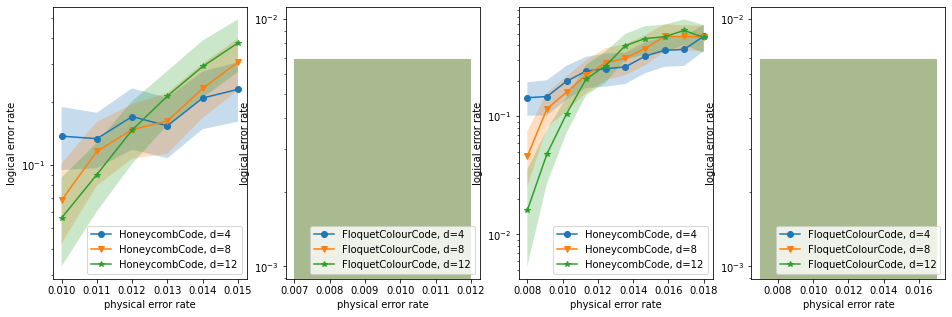

In [24]:
fig, axis = plt.subplots(1, 4,figsize=(16,5))
sinter.plot_error_rate(
        ax=axis[0],
        stats=hcc_X_error_samples_1_round,
        group_func=lambda stat: f"HoneycombCode, d={stat.json_metadata['distance']}",
        x_func=lambda stat: stat.json_metadata['per_x'])

sinter.plot_error_rate(
        ax=axis[1],
        stats=fcc_X_error_samples_1_round,
        group_func=lambda stat: f"FloquetColourCode, d={stat.json_metadata['distance']}",
        x_func=lambda stat: stat.json_metadata['per_x'])


sinter.plot_error_rate(
        ax=axis[2],
        stats=hcc_X_error_samples_2_rounds,
        group_func=lambda stat: f"HoneycombCode, d={stat.json_metadata['distance']}",
        x_func=lambda stat: stat.json_metadata['per_x'])

sinter.plot_error_rate(
        ax=axis[3],
        stats=fcc_X_error_samples_2_rounds,
        group_func=lambda stat: f"FloquetColourCode, d={stat.json_metadata['distance']}",
        x_func=lambda stat: stat.json_metadata['per_x'])

for ax in axis:
    ax.set_yscale('log')
    ax.set_xlabel('physical error rate')
    ax.set_ylabel('logical error rate')
    ax.legend(loc='lower right')

# Data qubit depolarizing

In [37]:
hcc_XYZ_error_samples_1_round = calculate_threshold('HoneycombCode',[4,8,12],2,np.linspace(0.0005,0.008,6),np.linspace(0.0005,0.008,6), np.linspace(0.0005,0.008,6),np.zeros(10))

|████████████████████████████████████████✗︎ (!) 195/194 [101%] in 0.1s (1651.62/s) 
|████████████████████████████████████████✗︎ (!) 195/194 [101%] in 0.5s (369.05/s) 
|████████████████████████████████████████✗︎ (!) 195/194 [101%] in 0.1s (1346.72/s) 
|████████████████████████████████████████✗︎ (!) 195/194 [101%] in 0.1s (1516.81/s) 
|████████████████████████████████████████✗︎ (!) 195/194 [101%] in 0.2s (1174.36/s) 
|████████████████████████████████████████✗︎ (!) 195/194 [101%] in 0.2s (1115.36/s) 
|████████████████████████████████████████✗︎ (!) 387/386 [100%] in 1.1s (336.67/s)                                        
|████████████████████████████████████████✗︎ (!) 387/386 [100%] in 0.8s (478.55/s)                                        259/386 [67%] in 1s (466.1/s, eta: 1s) 
|████████████████████████████████████████✗︎ (!) 387/386 [100%] in 1.0s (397.14/s)                                        
|████████████████████████████████████████✗︎ (!) 387/386 [100%] in 0.9s (441.76/s)           

Starting workers...
18 cases left
    case: processes=1  ~core_mins_left=1       shots_left=17300    errors_left=1990    {'code': 'HoneycombCode', 'distance': 4, 'per_x': 0.0005, 'per_y': 0.0005, 'per_z': 0.0005, 'mer': 0.0, 'layers': 8}
    case: processes=1  ~core_mins_left=None    shots_left=20000    errors_left=2000    {'code': 'HoneycombCode', 'distance': 4, 'per_x': 0.002, 'per_y': 0.002, 'per_z': 0.002, 'mer': 0.0, 'layers': 8}
    case: processes=1  ~core_mins_left=None    shots_left=20000    errors_left=2000    {'code': 'HoneycombCode', 'distance': 4, 'per_x': 0.0035, 'per_y': 0.0035, 'per_z': 0.0035, 'mer': 0.0, 'layers': 8}
    case: processes=1  ~core_mins_left=None    shots_left=20000    errors_left=2000    {'code': 'HoneycombCode', 'distance': 4, 'per_x': 0.005000000000000001, 'per_y': 0.005000000000000001, 'per_z': 0.005000000000000001, 'mer': 0.0, 'layers': 8}
    case: processes=1  ~core_mins_left=None    shots_left=20000    errors_left=2000    {'code': 'HoneycombCode'

In [36]:
fcc_XYZ_error_samples_1_round = calculate_threshold('FloquetColourCode',[4,8,12],1,np.linspace(0.0005,0.008,6),np.linspace(0.0005,0.008,6), np.linspace(0.0005,0.008,6),np.zeros(10))

|████████████████████████████████████████✗︎ (!) 195/194 [101%] in 0.1s (1449.04/s) 
|████████████████████████████████████████✗︎ (!) 195/194 [101%] in 0.2s (864.38/s)                                        
|████████████████████████████████████████✗︎ (!) 195/194 [101%] in 0.2s (1134.98/s) 
|████████████████████████████████████████✗︎ (!) 195/194 [101%] in 0.1s (1391.09/s) 
|████████████████████████████████████████✗︎ (!) 195/194 [101%] in 0.2s (1203.42/s)                                       
|████████████████████████████████████████✗︎ (!) 195/194 [101%] in 0.2s (1170.45/s)                                       
|████████████████████████████████████████✗︎ (!) 387/386 [100%] in 1.0s (392.29/s)                                        
|████████████████████████████████████████✗︎ (!) 387/386 [100%] in 1.5s (265.01/s)                                        ta: 2s) █▆▄ 319/386 [83%] in 1s (258.6/s, eta: 1s) in 1s (270.4/s, eta: 0s) 
|████████████████████████████████████████✗︎ (!) 387/386 [100%]

Starting workers...
18 cases left
    case: processes=1  ~core_mins_left=None    shots_left=20000    errors_left=2000    {'code': 'FloquetColourCode', 'distance': 4, 'per_x': 0.0005, 'per_y': 0.0005, 'per_z': 0.0005, 'mer': 0.0, 'layers': 4}
    case: processes=1  ~core_mins_left=None    shots_left=20000    errors_left=2000    {'code': 'FloquetColourCode', 'distance': 4, 'per_x': 0.002, 'per_y': 0.002, 'per_z': 0.002, 'mer': 0.0, 'layers': 4}
    case: processes=1  ~core_mins_left=None    shots_left=20000    errors_left=2000    {'code': 'FloquetColourCode', 'distance': 4, 'per_x': 0.0035, 'per_y': 0.0035, 'per_z': 0.0035, 'mer': 0.0, 'layers': 4}
    case: processes=1  ~core_mins_left=None    shots_left=20000    errors_left=2000    {'code': 'FloquetColourCode', 'distance': 4, 'per_x': 0.005000000000000001, 'per_y': 0.005000000000000001, 'per_z': 0.005000000000000001, 'mer': 0.0, 'layers': 4}
    case: processes=1  ~core_mins_left=None    shots_left=20000    errors_left=2000    {'code':

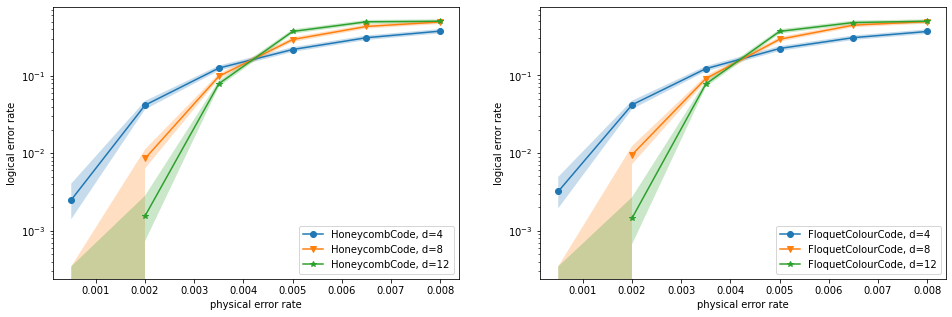

In [41]:
fig, axis = plt.subplots(1, 2,figsize=(16,5))
sinter.plot_error_rate(
        ax=axis[0],
        stats=hcc_XYZ_error_samples_1_round,
        group_func=lambda stat: f"HoneycombCode, d={stat.json_metadata['distance']}",
        x_func=lambda stat: stat.json_metadata['per_x'])

sinter.plot_error_rate(
        ax=axis[1],
        stats=fcc_XYZ_error_samples_1_round,
        group_func=lambda stat: f"FloquetColourCode, d={stat.json_metadata['distance']}",
        x_func=lambda stat: stat.json_metadata['per_x'])

for ax in axis:
    ax.set_yscale('log')
    ax.set_xlabel('physical error rate')
    ax.set_ylabel('logical error rate')
    ax.legend(loc='lower right')

# Measurement errors

In [15]:
hcc_M_error_samples_1_round = calculate_threshold('HoneycombCode',[4],2,np.zeros(7), np.zeros(7), np.zeros(7),np.linspace(0.005,0.012,7))

|████████████████████████████████████████✗︎ (!) 195/194 [101%] in 0.1s (1357.31/s) 
|████████████████████████████████████████✗︎ (!) 195/194 [101%] in 0.2s (1047.17/s) 
|████████████████████████████████████████✗︎ (!) 195/194 [101%] in 0.3s (590.35/s) 
|████████████████████████████████████████✗︎ (!) 195/194 [101%] in 0.1s (1551.38/s)                                       
|████████████████████████████████████████✗︎ (!) 195/194 [101%] in 0.1s (1529.80/s) 
|████████████████████████████████████████✗︎ (!) 195/194 [101%] in 0.1s (1523.32/s) 
|████████████████████████████████████████✗︎ (!) 195/194 [101%] in 0.1s (1345.68/s) 


Starting workers...
7 cases left
    case: processes=1  ~core_mins_left=None    (initializing...) {'code': 'HoneycombCode', 'distance': 4, 'per_x': 0.0, 'per_y': 0.0, 'per_z': 0.0, 'mer': 0.005, 'layers': 8}
    case: processes=1  ~core_mins_left=None    (initializing...) {'code': 'HoneycombCode', 'distance': 4, 'per_x': 0.0, 'per_y': 0.0, 'per_z': 0.0, 'mer': 0.006166666666666667, 'layers': 8}
    case: processes=1  ~core_mins_left=None    (initializing...) {'code': 'HoneycombCode', 'distance': 4, 'per_x': 0.0, 'per_y': 0.0, 'per_z': 0.0, 'mer': 0.007333333333333334, 'layers': 8}
    case: processes=1  ~core_mins_left=None    (initializing...) {'code': 'HoneycombCode', 'distance': 4, 'per_x': 0.0, 'per_y': 0.0, 'per_z': 0.0, 'mer': 0.0085, 'layers': 8}
    case: processes=1  ~core_mins_left=None    (initializing...) {'code': 'HoneycombCode', 'distance': 4, 'per_x': 0.0, 'per_y': 0.0, 'per_z': 0.0, 'mer': 0.009666666666666667, 'layers': 8}
    case: processes=1  ~core_mins_left=None   

In [7]:
fcc_M_error_samples_1_round = calculate_threshold('FloquetColourCode',[4,8,12],1,np.zeros(7), np.zeros(7), np.zeros(7),np.linspace(0.005,0.012,7))

|████████████████████████████████████████✗︎ (!) 195/194 [101%] in 0.1s (1470.55/s) 
|████████████████████████████████████████✗︎ (!) 195/194 [101%] in 0.2s (1173.65/s) 
|████████████████████████████████████████✗︎ (!) 195/194 [101%] in 0.1s (1306.46/s) 
|████████████████████████████████████████✗︎ (!) 195/194 [101%] in 0.2s (1109.03/s) 
|████████████████████████████████████████✗︎ (!) 195/194 [101%] in 0.2s (785.97/s) 
|████████████████████████████████████████✗︎ (!) 195/194 [101%] in 0.1s (1522.00/s) 
|████████████████████████████████████████✗︎ (!) 195/194 [101%] in 0.1s (1461.35/s) 
|████████████████████████████████████████✗︎ (!) 387/386 [100%] in 0.9s (447.59/s)                                        
|████████████████████████████████████████✗︎ (!) 387/386 [100%] in 0.8s (455.36/s)                                        eta: 2s) (454.9/s, eta: 1s) 
|████████████████████████████████████████✗︎ (!) 387/386 [100%] in 0.9s (411.95/s)                                         0s) 
|█████████████

Starting workers...
21 cases left
    case: processes=1  ~core_mins_left=None    shots_left=2000     errors_left=200     {'code': 'FloquetColourCode', 'distance': 4, 'per_x': 0.0, 'per_y': 0.0, 'per_z': 0.0, 'mer': 0.005, 'layers': 4}
    case: processes=1  ~core_mins_left=None    shots_left=2000     errors_left=200     {'code': 'FloquetColourCode', 'distance': 4, 'per_x': 0.0, 'per_y': 0.0, 'per_z': 0.0, 'mer': 0.006166666666666667, 'layers': 4}
    case: processes=1  ~core_mins_left=None    shots_left=2000     errors_left=200     {'code': 'FloquetColourCode', 'distance': 4, 'per_x': 0.0, 'per_y': 0.0, 'per_z': 0.0, 'mer': 0.007333333333333334, 'layers': 4}
    case: processes=1  ~core_mins_left=None    shots_left=2000     errors_left=200     {'code': 'FloquetColourCode', 'distance': 4, 'per_x': 0.0, 'per_y': 0.0, 'per_z': 0.0, 'mer': 0.0085, 'layers': 4}
    case: processes=1  ~core_mins_left=None    shots_left=2000     errors_left=200     {'code': 'FloquetColourCode', 'distance': 4,

In [9]:
hcc_M_error_samples_2_rounds = calculate_threshold('HoneycombCode',[4,8,12],4,np.zeros(7), np.zeros(7), np.zeros(7),np.linspace(0.005,0.012,7))

|████████████████████████████████████████✗︎ (!) 387/386 [100%] in 0.3s (1474.22/s)                                       
|████████████████████████████████████████✗︎ (!) 387/386 [100%] in 0.4s (1087.71/s)                                       
|████████████████████████████████████████✗︎ (!) 387/386 [100%] in 0.6s (638.70/s)                                        eta: 0s) 
|████████████████████████████████████████✗︎ (!) 387/386 [100%] in 0.3s (1344.18/s)                                       
|████████████████████████████████████████✗︎ (!) 387/386 [100%] in 0.5s (805.65/s)                                        
|████████████████████████████████████████✗︎ (!) 387/386 [100%] in 0.3s (1163.09/s)                                       
|████████████████████████████████████████✗︎ (!) 387/386 [100%] in 0.6s (691.84/s)                                        
|████████████████████████████████████████✗︎ (!) 771/770 [100%] in 3.2s (239.34/s)                                        ▆ 25/770 [3%] in

Starting workers...
21 cases left
    case: processes=1  ~core_mins_left=None    shots_left=2000     errors_left=200     {'code': 'HoneycombCode', 'distance': 4, 'per_x': 0.0, 'per_y': 0.0, 'per_z': 0.0, 'mer': 0.005, 'layers': 16}
    case: processes=1  ~core_mins_left=None    shots_left=2000     errors_left=200     {'code': 'HoneycombCode', 'distance': 4, 'per_x': 0.0, 'per_y': 0.0, 'per_z': 0.0, 'mer': 0.006166666666666667, 'layers': 16}
    case: processes=1  ~core_mins_left=None    shots_left=2000     errors_left=200     {'code': 'HoneycombCode', 'distance': 4, 'per_x': 0.0, 'per_y': 0.0, 'per_z': 0.0, 'mer': 0.007333333333333334, 'layers': 16}
    case: processes=1  ~core_mins_left=None    shots_left=2000     errors_left=200     {'code': 'HoneycombCode', 'distance': 4, 'per_x': 0.0, 'per_y': 0.0, 'per_z': 0.0, 'mer': 0.0085, 'layers': 16}
    case: processes=1  ~core_mins_left=None    shots_left=2000     errors_left=200     {'code': 'HoneycombCode', 'distance': 4, 'per_x': 0.0, '

In [10]:
fcc_M_error_samples_2_rounds = calculate_threshold('FloquetColourCode',[4,8,12],2,np.zeros(7), np.zeros(7), np.zeros(7),np.linspace(0.005,0.012,7))

|████████████████████████████████████████✗︎ (!) 387/386 [100%] in 0.3s (1280.98/s)                                       
|████████████████████████████████████████✗︎ (!) 387/386 [100%] in 0.3s (1449.37/s)                                       : 0s) 
|████████████████████████████████████████✗︎ (!) 387/386 [100%] in 0.3s (1408.98/s)                                       
|████████████████████████████████████████✗︎ (!) 387/386 [100%] in 0.4s (1068.02/s)                                       
|████████████████████████████████████████✗︎ (!) 387/386 [100%] in 0.4s (1083.36/s)                                       
|████████████████████████████████████████✗︎ (!) 387/386 [100%] in 0.3s (1213.46/s)                                       
|████████████████████████████████████████✗︎ (!) 387/386 [100%] in 0.4s (965.67/s)                                        
|████████████████████████████████████████✗︎ (!) 771/770 [100%] in 2.5s (307.69/s)                                              ▅▃▁ 379/770 [

Starting workers...
21 cases left
    case: processes=1  ~core_mins_left=None    shots_left=2000     errors_left=200     {'code': 'FloquetColourCode', 'distance': 4, 'per_x': 0.0, 'per_y': 0.0, 'per_z': 0.0, 'mer': 0.005, 'layers': 8}
    case: processes=1  ~core_mins_left=None    shots_left=2000     errors_left=200     {'code': 'FloquetColourCode', 'distance': 4, 'per_x': 0.0, 'per_y': 0.0, 'per_z': 0.0, 'mer': 0.006166666666666667, 'layers': 8}
    case: processes=1  ~core_mins_left=None    (initializing...) {'code': 'FloquetColourCode', 'distance': 4, 'per_x': 0.0, 'per_y': 0.0, 'per_z': 0.0, 'mer': 0.007333333333333334, 'layers': 8}
    case: processes=1  ~core_mins_left=None    (initializing...) {'code': 'FloquetColourCode', 'distance': 4, 'per_x': 0.0, 'per_y': 0.0, 'per_z': 0.0, 'mer': 0.0085, 'layers': 8}
    case: processes=1  ~core_mins_left=1       shots_left=1900     errors_left=180     {'code': 'FloquetColourCode', 'distance': 4, 'per_x': 0.0, 'per_y': 0.0, 'per_z': 0.0, '

NameError: name 'fcc_M_error_samples_1_round' is not defined

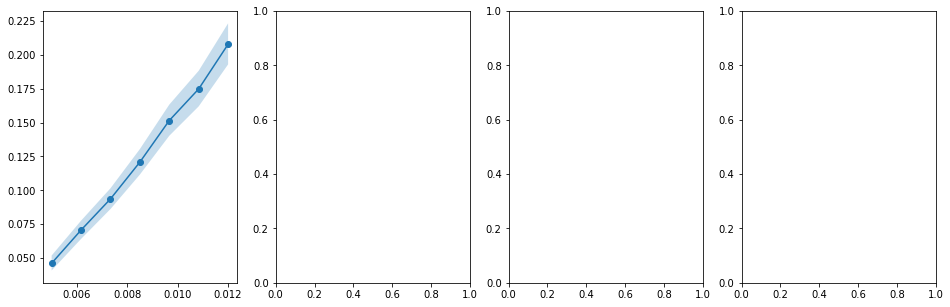

In [ ]:
fig, axis = plt.subplots(1, 4,figsize=(16,5))
sinter.plot_error_rate(
        ax=axis[0],
        stats=hcc_M_error_samples_1_round,
        group_func=lambda stat: f"HoneycombCode, d={stat.json_metadata['distance']}",
        x_func=lambda stat: stat.json_metadata['mer'])

sinter.plot_error_rate(
        ax=axis[1],
        stats=fcc_M_error_samples_1_round,
        group_func=lambda stat: f"FloquetColourCode, d={stat.json_metadata['distance']}",
        x_func=lambda stat: stat.json_metadata['mer'])


for ax in axis:
    ax.set_yscale('log')
    ax.set_xlabel('physical error rate')
    ax.set_ylabel('logical error rate')
    ax.legend(loc='lower right')
